<a href="https://colab.research.google.com/github/GoryachevDaniil/Amberdata_test_task/blob/main/Amberdata_test_task_ds_de_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://amberdata-storage.notion.site/0a78268597604acab847e67a0052b083


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize' : (9, 6)})
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Task 1.

In [3]:
! pip install jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import jsonlines
import json
import csv

In [5]:
with jsonlines.open('/content/gdrive/MyDrive/Amberdata_test_task_ds_de/assignment_data.jsonl', 'r') as jsonl_f:
     lst = [obj for obj in jsonl_f]

In [6]:
cols = ['player_id','country','event','session_id', 'ts']
data = []
for i in range(len(lst)):
  try:
    tmp_dict = {'player_id' : lst[i]['player_id'], 'country' : lst[i]['country'], 'event' : lst[i]['event'], 'session_id' : lst[i]['session_id'], 'ts' : lst[i]['ts']}
  except:
    tmp_dict = {'player_id' : lst[i]['player_id'], 'country' : np.nan, 'event' : lst[i]['event'], 'session_id' : lst[i]['session_id'], 'ts' : lst[i]['ts']}
  finally:
    data.append(tmp_dict.values())


In [7]:
df = pd.DataFrame(data, columns=cols)
df.head()

,player_id,country,event,session_id,ts
0,d6313e1fb7d247a6a034e2aadc30ab3f,PK,start,674606b1-2270-4285-928f-eef4a6b90a60,2016-11-22T20:40:50
1,20ac16ebb30a477087c3c7501b1fce73,NaN,end,16ca9d01-d240-4527-9f8f-00ef6cddb1d4,2016-11-18T06:24:50
2,318e22b061b54042b880c365c28982d0,NaN,end,5f933591-8cd5-4147-8736-d6237bef5891,2016-11-16T18:01:37
3,29bb390d9b1b4b4b9ec0d6243da34ec4,NaN,end,ef939180-692a-4845-aef7-afb03524c2da,2016-11-13T10:38:09
4,a477ecabc3cc455cb1c6d1dab77d8e5c,GH,start,4c55263e-66b2-4814-b431-8ca4c1a9dcc8,2016-11-29T19:31:43


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001169 entries, 0 to 1001168
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   player_id   1001169 non-null  object
 1   country     500584 non-null   object
 2   event       1001169 non-null  object
 3   session_id  1001169 non-null  object
 4   ts          1001169 non-null  object
dtypes: object(5)
memory usage: 38.2+ MB


In [9]:
df.describe() 

,player_id,country,event,session_id,ts
count,1001169,500584,1001169,1001169,1001169
unique,19615,246,2,500587,830451
top,e348055ce4244e21ad045500b89ef37a,IT,end,674606b1-2270-4285-928f-eef4a6b90a60,2016-11-11T15:11:45
freq,100,2839,500585,2,6


In [10]:
df_sort = df.sort_values(by='ts', ignore_index = True)

In [11]:
df_sort

,player_id,country,event,session_id,ts
0,03c648a9437d401b8e326cd1f93bd06e,NaN,end,cd0f2f42-3ab2-4506-bbf7-00f58909b9ef,2016-10-20T23:40:38
1,f31432131e56427d8b75338a2b4f8048,IQ,start,d2063b29-2a82-49b3-9642-93d52f3198df,2016-11-02T14:35:53
2,aba0274a926a4ccdb94876c8e4dcb0c6,MF,start,7ff15b72-a2a3-4abb-8c3e-354034168d07,2016-11-02T14:35:59
3,adc13c0804874368bd8660cdad928042,SX,start,a5d5f69d-cf2c-4963-af15-a06ada66bcd9,2016-11-02T14:36:01
4,a974a5ca4ec84db98b4f73169e1569d9,WS,start,b562fe4d-fe84-40b9-bc83-658a17d7740d,2016-11-02T14:36:06
...,...,...,...,...,...
1001164,c13caf3755494aa793477e1c9fe23281,NaN,end,999d47c2-0bef-45f2-b089-ce062c7a9a0f,2016-12-02T16:25:09
1001165,efeff2d5dcad4c6e97bab577585caeb6,NaN,end,965e3f52-7f04-41d8-a72e-d3e3fada6494,2016-12-02T16:25:48
1001166,d1ce46d3b8814b78a1a812fbf2d5cf01,NaN,end,2511dcc9-3bc2-4e1b-b6b4-49e1ccfc27dd,2016-12-02T16:26:32
1001167,2d6e4a475b364336893d490bcec50035,NaN,end,b103e065-139d-4f85-bbba-b905661cf42c,2016-12-02T16:28:17


In [12]:
df_res = df_sort[df_sort['event'] == 'start'].copy()
df_res.rename(columns = {'ts' : 'session_start_time'}, inplace = True)
tmp = df_sort[df_sort['event'] == 'end'].copy()
tmp.rename(columns = {'ts' : 'session_end_time'}, inplace = True)
tmp.drop(columns=['country'], inplace=True)

In [13]:
df_res.head()

,player_id,country,event,session_id,session_start_time
1,f31432131e56427d8b75338a2b4f8048,IQ,start,d2063b29-2a82-49b3-9642-93d52f3198df,2016-11-02T14:35:53
2,aba0274a926a4ccdb94876c8e4dcb0c6,MF,start,7ff15b72-a2a3-4abb-8c3e-354034168d07,2016-11-02T14:35:59
3,adc13c0804874368bd8660cdad928042,SX,start,a5d5f69d-cf2c-4963-af15-a06ada66bcd9,2016-11-02T14:36:01
4,a974a5ca4ec84db98b4f73169e1569d9,WS,start,b562fe4d-fe84-40b9-bc83-658a17d7740d,2016-11-02T14:36:06
5,7b90712f5e344a3cb7c3e55cc4fc863d,ID,start,b853fc9a-4c20-4cf2-9933-c8505e7c982b,2016-11-02T14:36:06


In [14]:
tmp.head()

,player_id,event,session_id,session_end_time
0,03c648a9437d401b8e326cd1f93bd06e,end,cd0f2f42-3ab2-4506-bbf7-00f58909b9ef,2016-10-20T23:40:38
59,6c1f82e0816e46e1806e7ee327ac0fd2,end,fdc59077-ac71-4bdf-a2a2-a43dad3d4336,2016-11-02T14:40:57
77,65f80218ab4f4a0c9aca643d90f7713b,end,4b0f35c9-3ff2-488b-bbc2-cd6c00c4b0f7,2016-11-02T14:42:14
90,234409285f084bfebc46ddb09a0898c8,end,9919325c-420b-414b-b163-da113232928f,2016-11-02T14:43:26
119,adc13c0804874368bd8660cdad928042,end,a5d5f69d-cf2c-4963-af15-a06ada66bcd9,2016-11-02T14:45:24


In [15]:
df_res = df_res.merge(tmp, on='session_id', how='outer')
df_res['player_id_x'] = df_res['player_id_y'].combine_first(df_res['player_id_x'])
df_res.drop('player_id_y', axis=1, inplace=True)
df_res.rename(columns = {'ts' : 'session_end_time', 'player_id_x' : 'player_id'}, inplace = True)
df_res.rename(columns = {'event_x' : 'event_start', 'event_y' : 'event_end'}, inplace = True)
df_res = df_res.reindex(columns=['player_id',	'country',	'session_id',  'event_start',  'session_start_time',	'event_end',	'session_end_time'])
df_res['session_start_time'] = pd.to_datetime(df_res['session_start_time'])
df_res['session_end_time'] = pd.to_datetime(df_res['session_end_time'])
df_res['event_start'] = df_res['event_start'] == 'start'
df_res['event_end'] = df_res['event_end'] == 'end'
df_res

,player_id,country,session_id,event_start,session_start_time,event_end,session_end_time
0,f31432131e56427d8b75338a2b4f8048,IQ,d2063b29-2a82-49b3-9642-93d52f3198df,True,2016-11-02 14:35:53,True,2016-11-02 15:11:30
1,aba0274a926a4ccdb94876c8e4dcb0c6,MF,7ff15b72-a2a3-4abb-8c3e-354034168d07,True,2016-11-02 14:35:59,True,2016-11-02 15:00:14
2,adc13c0804874368bd8660cdad928042,SX,a5d5f69d-cf2c-4963-af15-a06ada66bcd9,True,2016-11-02 14:36:01,True,2016-11-02 14:45:24
3,a974a5ca4ec84db98b4f73169e1569d9,WS,b562fe4d-fe84-40b9-bc83-658a17d7740d,True,2016-11-02 14:36:06,True,2016-11-02 15:24:11
4,7b90712f5e344a3cb7c3e55cc4fc863d,ID,b853fc9a-4c20-4cf2-9933-c8505e7c982b,True,2016-11-02 14:36:06,True,2016-11-02 15:05:26
...,...,...,...,...,...,...,...
500582,1ea2530b9fd64681953a63bf6af99fe6,GL,03218557-ce06-4cdb-9634-17a6a144aba0,True,2016-12-02 14:35:39,True,2016-12-02 16:11:13
500583,c57f25d7a121408d8c99de4e9280e255,UM,8bedc4f6-dbb3-4f39-9cd7-2581ad985d26,True,2016-12-02 14:35:56,True,2016-12-02 15:58:47
500584,d3a36675963e4f8785e5ab97743748b6,NaN,f1853475-d52a-49b3-8a43-9097ffa16b7b,False,NaT,True,2016-11-05 03:02:11
500585,e8fac647fa744482a03831774d98ac3a,NaN,2332d9cb-74ed-43f9-998a-9de87a40b389,False,NaT,True,2016-11-20 22:04:07


In [16]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500587 entries, 0 to 500586
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   player_id           500587 non-null  object        
 1   country             500584 non-null  object        
 2   session_id          500587 non-null  object        
 3   event_start         500587 non-null  bool          
 4   session_start_time  500584 non-null  datetime64[ns]
 5   event_end           500587 non-null  bool          
 6   session_end_time    500585 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](2), object(3)
memory usage: 23.9+ MB


In [17]:
df_res.dtypes

player_id                     object
country                       object
session_id                    object
event_start                     bool
session_start_time    datetime64[ns]
event_end                       bool
session_end_time      datetime64[ns]
dtype: object

In [18]:
df_res.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,player_id,country,session_id,event_start,session_start_time,event_end,session_end_time
count,500587,500584,500587,500587,500584,500587,500585
unique,19615,246,500587,2,455260,2,455018
top,5534f125269940e299d2aa38199e1552,IT,d2063b29-2a82-49b3-9642-93d52f3198df,True,2016-11-16 05:38:46,True,2016-11-23 22:21:18
freq,50,2839,1,500584,5,500585,5
first,NaN,NaN,NaN,NaN,2016-11-02 14:35:53,NaN,2016-10-20 23:40:38
last,NaN,NaN,NaN,NaN,2016-12-02 14:35:56,NaN,2016-12-02 16:34:40


In [19]:
df.describe()

,player_id,country,event,session_id,ts
count,1001169,500584,1001169,1001169,1001169
unique,19615,246,2,500587,830451
top,e348055ce4244e21ad045500b89ef37a,IT,end,674606b1-2270-4285-928f-eef4a6b90a60,2016-11-11T15:11:45
freq,100,2839,500585,2,6


1. Сколько сеансов в наборе данных?

In [20]:
df_res['session_id'].nunique() 

500587

2. Сколько сеансов завершается в каждой стране? Выведите 10 лучших результатов, отсортированных по
количеству (DESC) и стране (ASC).

In [21]:
df_res.groupby('country', as_index=False).event_start.count() \
                                          .sort_values(by=['event_start', 'country'], ascending=False, ignore_index=True)\
                                          .rename(columns = {'event_start' : 'sessions_count'})\
                                          .head(10)

,country,sessions_count
0,IT,2839
1,SH,2672
2,AZ,2670
3,AT,2655
4,WF,2616
5,VA,2602
6,HU,2584
7,IL,2563
8,RO,2550
9,KR,2535


3. Сколько сессий завершает каждый игрок? Выведите 10 лучших результатов, отсортированных по
count(DESC) и player_id(ASC).

In [22]:
df_res.groupby('player_id', as_index=False).event_start.count() \
                                          .sort_values(by=['event_start', 'player_id'], ascending=False, ignore_index=True)\
                                          .rename(columns = {'event_start' : 'event_count'})\
                                          .head(10)

,player_id,event_count
0,fec6a0b9b7f143d8b45221bcc965dfde,50
1,fec32bc801d4497298d0bd781b9c701d,50
2,fea372b3b016474fa96b62da9c7fade1,50
3,fe9ed795e00a43219bac48977041f62a,50
4,fe67ba34f8ef48edae14218fba8f7ef9,50
5,fe4b6d22080449148b9e0b1b17d72d35,50
6,fe3822c6dd3b4af0b50ac897fa2aa46e,50
7,fdae77dd943947ea8f5b7970c17baf3c,50
8,fd9a7f6f335745fdbe0f13f92000e43e,50
9,fd640311b9ff4d96ba0deb5a3cab25f6,50


4. В какой стране в 2016 году было начато наибольшее количество сеансов?

In [24]:
df_res['Year'] = df_res['session_start_time'].dt.strftime('%Y')

In [27]:
df_res[(df_res['event_start'] == True) & (df_res['Year'] == '2016')].groupby('country', as_index=False) \
                                                                        .session_id.count() \
                                                                        .rename(columns={'session_id' : 'session_id_count' }) \
                                                                        .max()

country               ZW
session_id_count    2839
dtype: object

5. График завершенных сеансов  по странам. Гистограмма 10 лучших результатов, отсортированных по
количеству (DESC) и стране (ASC).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd926e3c750>]],
      dtype=object)

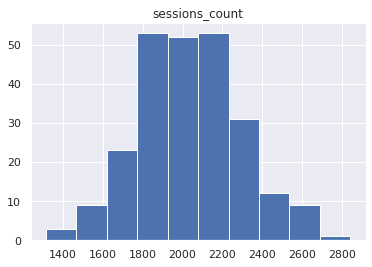

In [28]:
df_res.groupby('country', as_index=False).event_end.count() \
                                          .sort_values(by=['event_end', 'country'], ascending=False, ignore_index=True)\
                                          .rename(columns = {'event_end' : 'sessions_count'})\
                                          .hist()